# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
train = pd.read_csv('train.csv')

In [5]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [4]:
train = train.drop(columns=['dropoff_datetime'])
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [7]:
plt.figure(figsize=(12, 7))

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Таргет')]

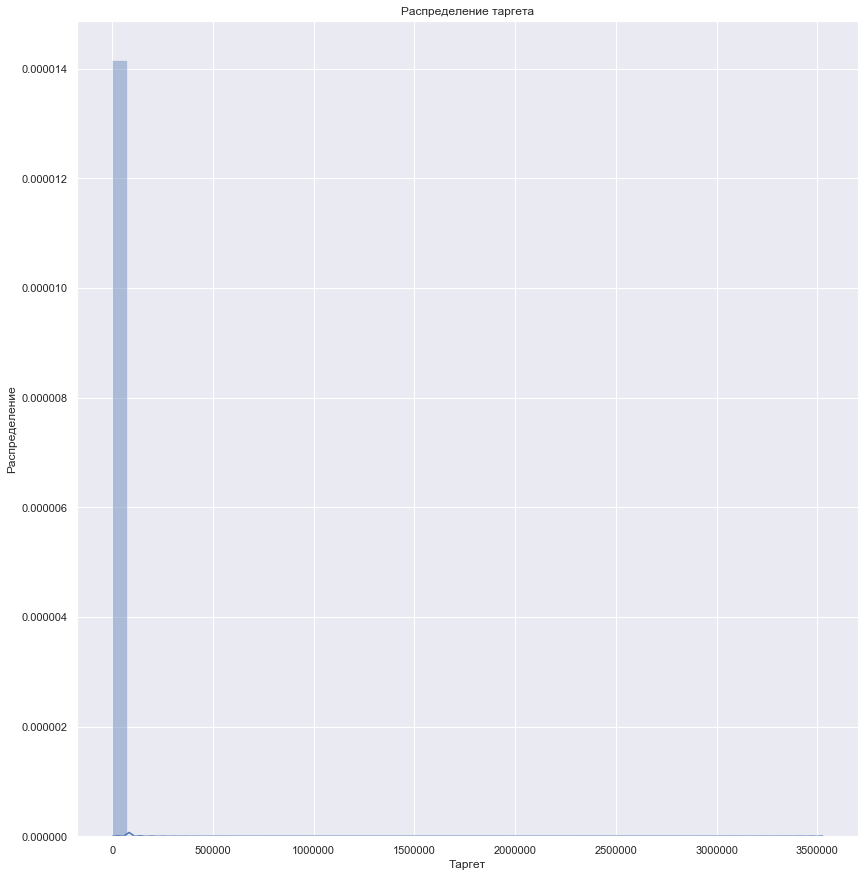

In [197]:
sns_plot = sns.distplot(train["trip_duration"])
fig = sns_plot.get_figure()
plt.title("Распределение таргета")
plt.gca().set(xlabel='Таргет', ylabel='Распределение')

почти все значения очень маленькие! посмотрю, сколько очень больших

In [195]:
target = train["trip_duration"].sort_values()
target[-20:]

1233528      86367
1213613      86367
1269316      86369
1284067      86369
779030       86369
172662       86369
1138915      86377
66346        86377
1221666      86378
91717        86378
753765       86379
1360439      86385
59891        86387
73816        86390
295382       86391
1234291      86392
355003     1939736
680594     2049578
924150     2227612
978383     3526282
Name: trip_duration, dtype: int64

т.е. последние четыре значения очень большие, а предыдущие поменьше. может, мне что-то даст построить гистрограмму всех значений, кроме последних четырех

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Таргет')]

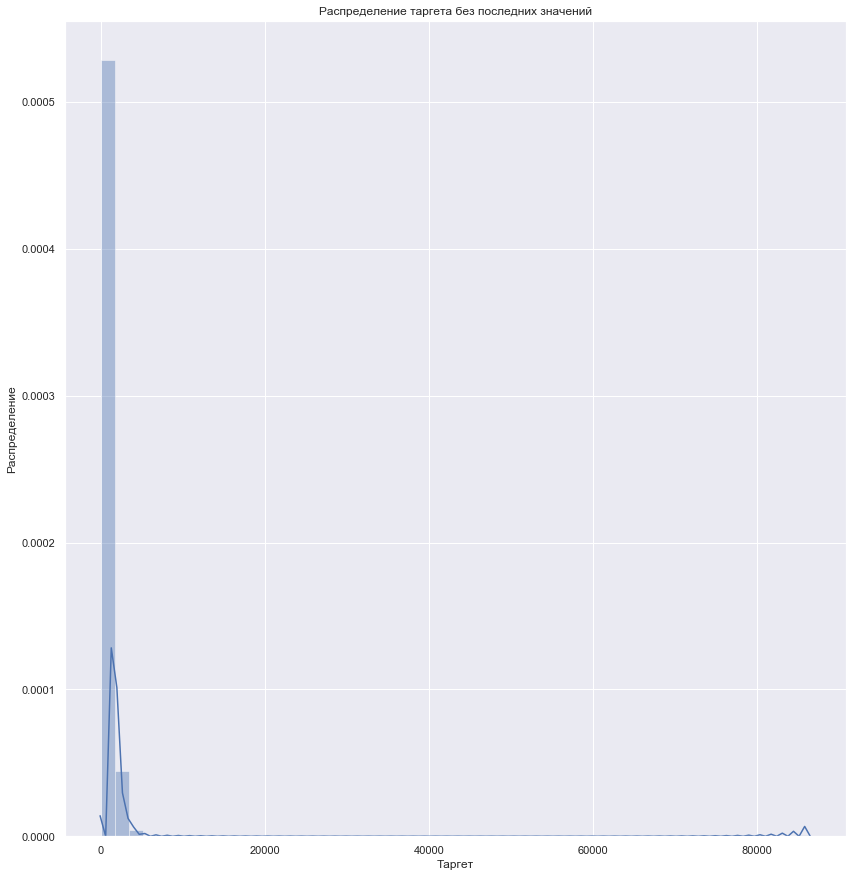

In [196]:
sns_plot = sns.distplot(target[:-4])
fig = sns_plot.get_figure()
plt.title("Распределение таргета без последних значений")
plt.gca().set(xlabel='Таргет', ylabel='Распределение')

так яснее! есть четыре выброса очень больших, в основном trip_duration принимает маленькие значения, но есть немножко больших и еще вдруг множко значений больше 80000

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В основном значения меньше 5000. Но есть еще много значений больше 80000 (но значительно меньше, чем значений до 5000). Значений между 5000 и где-то до 80000 очень-очень-очень мало. Распределение совсем не равномерное. Есть слишком большие длительности поездки --- вряд ли они на самом деле были такие долгие --- т.е. выбросы.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**. У нас есть достаточно огромных значений, но гораздо больше --- маленьких. Если у нас будет ошибка на огромных значениях большая по абсолютному значению, хотя относительно величины правильного ответа и прогноза может быть и не очень большая, то мы главным образом, чтобы уменьшить ошибку в RMSE, уменьшим эту ошибку и как можно сильнее (аналогично с тем, что MSE/RMSE подстраивается под выбросы, потому что их выгоднее оптимизировать). Так не очень. Мы не хотим, чтобы большие ошибки на очень больших числах так сильно учитывались главным образом. Логарифмирование делает значения меньше и позволяет меньше штрафовать большие ошибки на очень больших числах.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: Запишем задачу оптимизации для MSE. Мы считаем ошибку для модели $\hat{a}$ при ответах $\hat{y_i}.$ Тогда $MSE(\hat{a}) = \frac{1}{l} \sum (\hat{a}(x_i) - \hat{y_i}).$ 

Теперь для RMSLE. Мы считаем ошибку для модели $a$ при ответах $y_i.$ Тогда RMSLE(a) = $\sqrt{\frac{1}{l} \sum (\log(y_i + 1) - \log(a(x_i) + 1))^2} = \sqrt{\frac{1}{l} \sum (\hat{y_i} - \log(\exp(\hat{a}(x_i) - 1 + 1))^2} = \sqrt{\frac{1}{l} \sum (\hat{y_i} - \log(\exp(\hat{a}(x_i)))^2} = \sqrt{\frac{1}{l} \sum (\hat{y_i} - \hat{a}(x_i))^2} = \sqrt{\frac{1}{l} \sum (\hat{a}(x_i) - \hat{y_i})^2}.$ 

Т.к. $f(x) = \sqrt(x)$ --- монотонно возрастающая функция, при $x_1, x_2 \geq 0$ по определению монотонно возрастающей функции $x_1 < x_2 \Leftrightarrow \sqrt{x_1} < \sqrt{x_2}$. Значит, минимизация $f(x)$ и $\sqrt{f(x)}$ при $f(x) \geq 0$ --- одно и то же. Поэтому оптимизация RMSLE(a) = $\sqrt{\frac{1}{l} \sum (\hat{a}(x_i) - \hat{y_i})^2}$ --- это оптимизация $\frac{1}{l} \sum (\hat{a}(x_i) - \hat{y_i})^2 = MSE(\hat{a})$.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [5]:
train["log_trip_duration"] = np.log1p(train["trip_duration"])
train = train.drop(columns=["trip_duration"])

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Логарифм целевой переменной')]

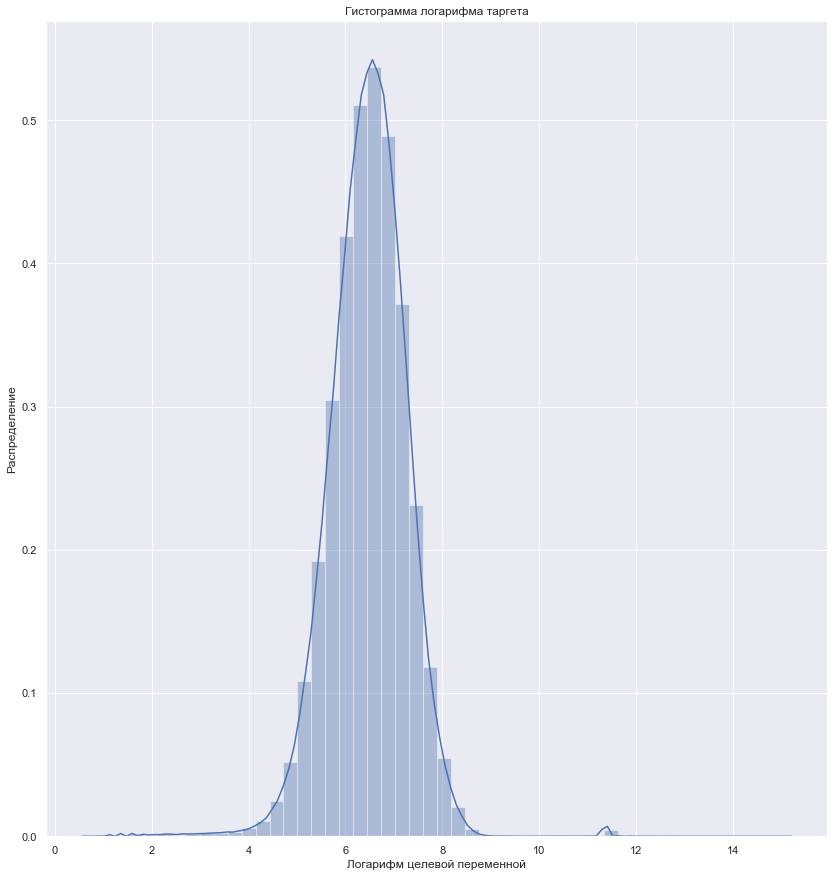

In [193]:
sns_plot = sns.distplot(train["log_trip_duration"])
fig = sns_plot.get_figure()
plt.title("Гистограмма логарифма таргета")
plt.gca().set(xlabel='Логарифм целевой переменной', ylabel='Распределение')

Стало в сто раз лучше!!! Потому что логарифм сильно сглаживает! ln(9000) ~ 9, например!

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Для MSE лучшим константным прогнозом будет среднее правильных ответов. Покажем это. Пусть модель выдает константный прогноз a. Тогда $MSE = \frac{1}{l} \sum (a - y_i)^2.$ Найдем такой прогноз а, при котором достигается минимум MSE: возьмем производную по а и найдем ее нуль.

$\frac{d(MSE)}{da} = \frac{1}{l} \frac{d(\sum (a - y_i)^2)}{da} = \frac{2}{l} \sum (a - y_i).$

Нуль производной: $(a - y_1) + (a - y_2) + ... + (a - y_l) = 0 \Leftrightarrow l * a - (y_1 + ... + y_l) = 0 \Leftrightarrow a = \frac{y_1 + ... + y_l}{l}.$ Слева от этого значения производная убывает, справа --- возрастает (можно подставить 0 и (наш_ответ + 1)). Значит, мы нашли точку минимума. Действительно, лучшим константным прогнозом будет среднее по правильным ответам.

In [31]:
best_ans = train["log_trip_duration"].mean()
best_metr = sum((best_ans - train["log_trip_duration"]) ** 2) * 1/len(train)

print(best_metr)

0.6332327625406583


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [6]:
# сделаю столбик, где будет только день начала поездки

train["pickup_day"] = train["pickup_datetime"].dt.date

In [10]:
len(set(train["pickup_day"]))

# кажется, что тогда подписать все дни на оси не очень возможно...

182

In [414]:
train = train.sort_values(by=["pickup_day"])
days = set(train["pickup_day"].apply(lambda x: x.strftime('%Y/%m/%d')))
x = sorted(list(days))[::10]  # беру каждое десятое значение для подписи на осях

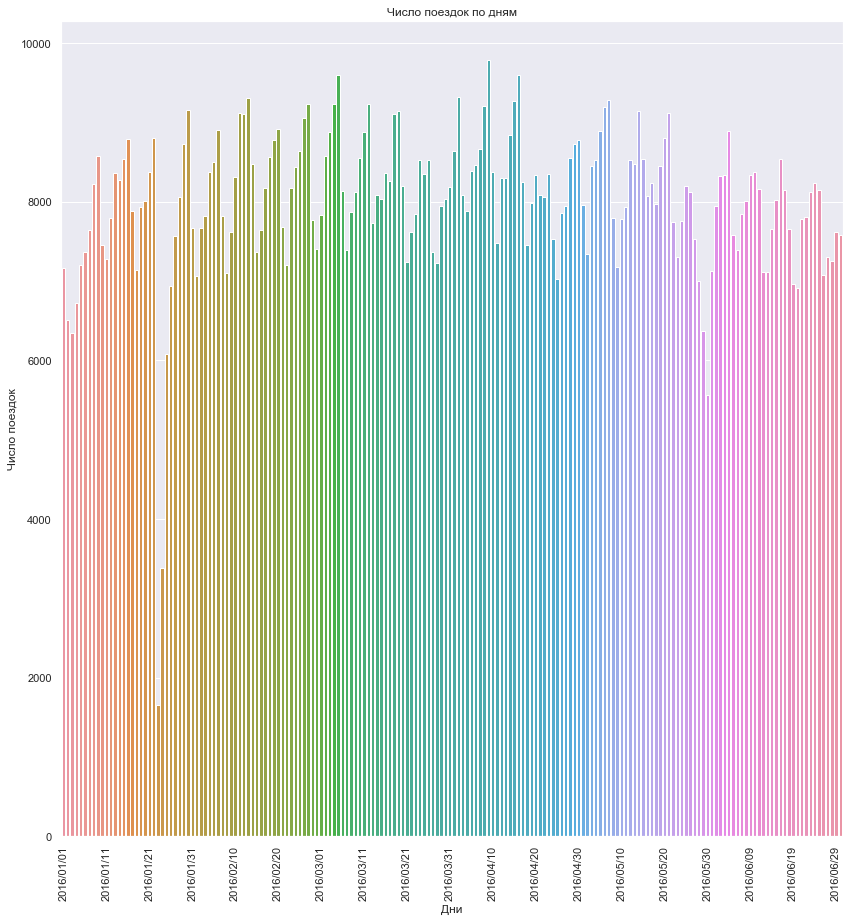

In [377]:
ax = sns.countplot(x="pickup_day", data=train)
plt.title("Число поездок по дням")
plt.gca().set(xlabel='Дни', ylabel='Число поездок')
ax.set_xticks(np.linspace(0, 180, len(x)))
ax.set_xticklabels(x, rotation='vertical')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [12]:
counts = train.groupby(["pickup_day"]).count()["id"]

In [13]:
# первый минимум
first_min = counts.idxmin()

# второй минимум
second_min = counts.drop(first_min).idxmin()

In [14]:
first_min, second_min

(datetime.date(2016, 1, 23), datetime.date(2016, 1, 24))

Это пока все еще один период. Ищем дальше тогда. Спасибо за расширение кругозора! 23-24 января 2016 в Нью-Йорке был снежный шторм и власти запретили автомобильное движение. Ищем следующий период.

In [498]:
third_min = counts.drop([first_min, second_min]).idxmin()
third_min

datetime.date(2016, 5, 30)

Нашли второй! Проверим на всякий случай, не будет ли следующий минимум продолжением этого периода.

In [499]:
fourth_min = counts.drop([first_min, second_min, third_min]).idxmin()
fourth_min

datetime.date(2016, 1, 25)

Нет, уже не будет. Нашли два периода. Спасибо за расширение кругозора! **Ответ.** 23-24 января 2016 в Нью-Йорке был снежный шторм и власти запретили автомобильное движение. 30 мая --- День Памяти.

Теперь график зависимости количества поездок от дня недели и часов в сутках.

In [8]:
import datetime
import calendar

In [9]:
train["weekday"] = train["pickup_day"].apply(lambda x: calendar.day_name[x.weekday()])
count_day = train.groupby("weekday").count()["id"].reset_index()

# сортирую по дням недели
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_day['weekday'] = pd.Categorical(count_day['weekday'], categories=cats, ordered=True)
count_day = count_day.sort_values('weekday')

# день недели поездки + число поездок по дням

In [10]:
train["pickup_hour"] = train["pickup_datetime"].dt.hour
count_hour = train.groupby("pickup_hour").count()["id"].reset_index()

# час поездки

[Text(-12.415, 0.5, 'Число поездок'),
 Text(0.5, 8.913124999999994, 'День недели')]

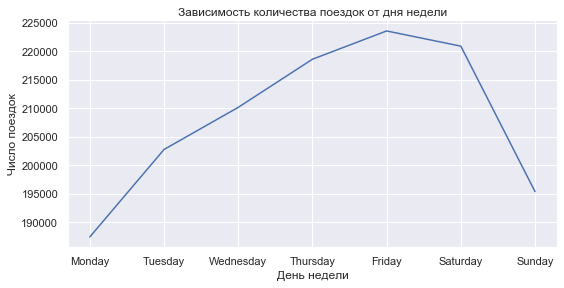

In [445]:
sns.relplot(data=count_day, x='weekday', height=4, aspect=2, y='id', kind='line')
plt.title("Зависимость количества поездок от дня недели")
plt.gca().set(xlabel='День недели', ylabel='Число поездок')

[Text(-6.289999999999999, 0.5, 'Число поездок'),
 Text(0.5, 8.95999999999998, 'Час')]

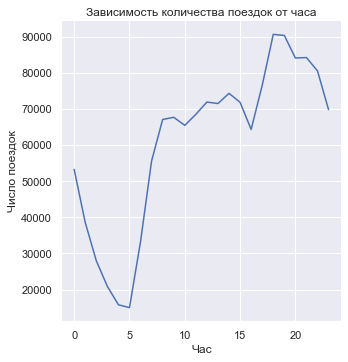

In [192]:
sns.relplot(x="pickup_hour", y="id", kind="line", data=count_hour)
plt.title("Зависимость количества поездок от часа")
plt.gca().set(xlabel='Час', ylabel='Число поездок')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [11]:
train["month"] = train["pickup_day"].apply(lambda x: calendar.month_name[x.month])
month_hour = train.groupby(["month", "pickup_hour"]).count()["id"].reset_index()

[Text(35.95122916666668, 0.5, 'Число поездок'),
 Text(0.5, 20.80000000000001, 'Час')]

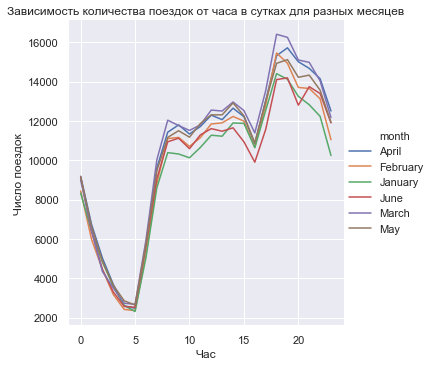

In [172]:
sns.relplot(x="pickup_hour", y="id", hue="month", kind="line", legend="full", data=month_hour)
plt.title("Зависимость количества поездок от часа в сутках для разных месяцев")
plt.gca().set(xlabel='Час', ylabel='Число поездок')

In [358]:
week_hour = train.groupby(["weekday", "pickup_hour"]).count()["id"].reset_index()

[Text(35.81570833333335, 0.5, 'Число поездок'),
 Text(0.5, 20.80000000000001, 'Час')]

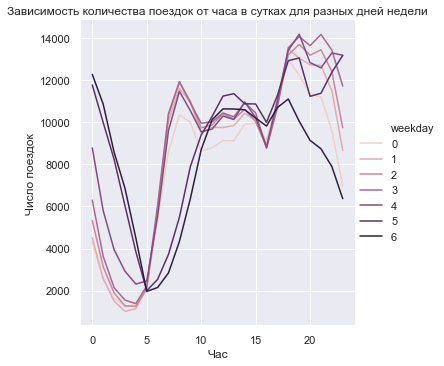

In [173]:
sns.relplot(x="pickup_hour", y="id", hue="weekday", kind="line", legend="full", data=week_hour)
plt.title("Зависимость количества поездок от часа в сутках для разных дней недели")
plt.gca().set(xlabel='Час', ylabel='Число поездок')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**. В ночное время по месяцам число поездок примерно не отличается. Число поездок наименьшее в 5 утра, после чего повышается (поездки на работу/учебу). Где-то в 9, когда все уже доехали, оно начинает немного снижаться до 10 утра (почему в 10 начинает расти снова у меня нет объяснений всю жизнь). Где-то с 16 и до 19 люди возвращаются с работы, поэтому число поездок увеличивается. Поведение графиков (прмежутки возрастания/убывания) каждый месяц примерно одинаковое, т.к. распорядок дня у людей не меняется. Видно, что самый популярный для поездок месяц --- март. Самый непопулярный для утренних/дневных поездок --- январь (наверняка потому что достаточная часть там праздничные дни, в которые многие уезжают, сидят дома или гуляют пешком). Возможно, потому что очень слякотно, и идти пешком не хочется. Или потому что 8 марта в этот месяц. Видно, что больше всего ночных поездок по выходным. В будни число утренних поездок значительно больше числа поездок в выходные, конечно. В воскресенье число вечерних поездок самое маленькое (в будни вечером возвращаются с работы, в субботу с развлечений, а в воскресенье нужно ложиться спать так, чтобы в понедельник встать на работу...) Только в субботу и в немного в пятницу к ночи число поездок возрастает (думаю, связано опять-таки с тем, что только в эти дни можно себе позволить уезжать ночью или откуда-то поздно возвращаться).

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [12]:
target = train["log_trip_duration"]

# train = train.drop(columns=["log_trip_duration"])
# удалять тут таргет оказалось неудобно очень, перед обучением удалю

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42, shuffle=True)

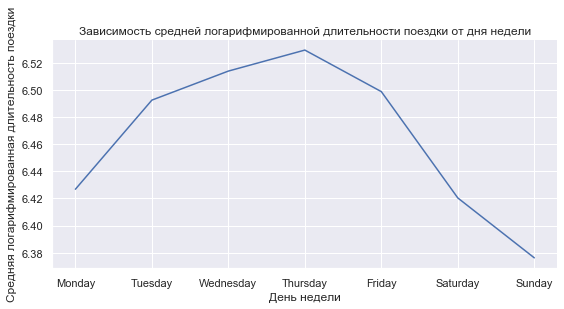

In [448]:
med_dur = X_train.groupby(["weekday"]).mean()["log_trip_duration"].reset_index()

# сортирую
med_dur['weekday'] = pd.Categorical(med_dur['weekday'], categories=cats, ordered=True)
med_dur = med_dur.sort_values('weekday')

ax = sns.relplot(x="weekday", y="log_trip_duration", kind="line", height=4, aspect=2, data=med_dur)
plt.title("Зависимость средней логарифмированной длительности поездки от дня недели")
plt.gca().set(xlabel='День недели', ylabel='Средняя логарифмированная длительность поездки')
plt.show()

[Text(2.835000000000001, 0.5, 'Средняя логарифмированная длительность поездки'),
 Text(0.5, 8.959999999999994, 'Час')]

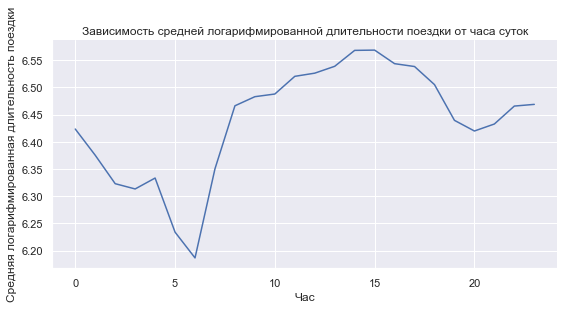

In [389]:
med_dur = X_train.groupby(["pickup_hour"]).mean()["log_trip_duration"].reset_index()
sns.relplot(x="pickup_hour", y="log_trip_duration", kind="line", height=4, aspect=2, data=med_dur)
plt.title("Зависимость средней логарифмированной длительности поездки от часа суток")
plt.gca().set(xlabel='Час', ylabel='Средняя логарифмированная длительность поездки')

[Text(8.96, 0.5, 'Средняя логарифмированная длительность поездки'),
 Text(0.5, 8.95999999999998, 'Дни')]

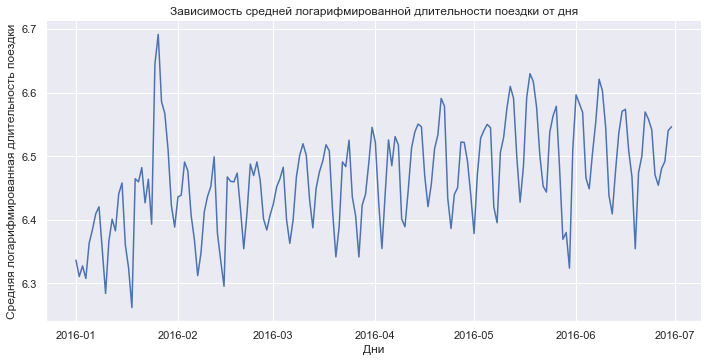

In [454]:
med_dur = X_train.groupby(["pickup_day"]).mean()["log_trip_duration"].reset_index()
ax = sns.relplot(data=med_dur, x="pickup_day", y="log_trip_duration", kind='line', aspect=2)

plt.title("Зависимость средней логарифмированной длительности поездки от дня")
plt.gca().set(xlabel='Дни', ylabel='Средняя логарифмированная длительность поездки')

#по оси указаны месяцы, т.к. дни не помещались

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Выглядят похоже, но для для недели максимум и минимум достигаются в разные дни. Графики для часов больше похожи, будто один --- растянутый другой, хотя минимум и максимум тоже достигаются в разные дни. Почему поведение одинаковое? Когда число поездок увеличивается, увеличиваются пробки => увеличивается время поездки. Когда на дорогах свободно, пробок нет => машины едут быстрее => время поездки уменьшается. Поэтому так напрямую связаны средняя длительность поездки и число поездок => и графики похожие.

Средний таргет в аномальный период --- локальный минимум. Когда был снегопад, мы видели, что было очень мало поездок => мало пробок => в целом, поездки были не очень долгие (хотя из-за осторожности и снегопада и могли быть более продолжительными, но все же на дорогах не пробки). Поэтому в этой точке минимум. В День памяти выходной => мало кто ехал на работу, как мы видели, было мало поездок => не было пробок => обошлось без очень длительных поездок. После все опять стало выправляться: снова рабочие дни, много поездок и т.д.

In [501]:
# убедимся, что это точно те аномальные периоды на графике, посчитав их значение

print(med_dur.iloc[22], med_dur.iloc[23], med_dur.iloc[150], sep='\n\n')

pickup_day           2016-01-23
log_trip_duration       6.46378
Name: 22, dtype: object

pickup_day           2016-01-24
log_trip_duration       6.39296
Name: 23, dtype: object

pickup_day           2016-05-30
log_trip_duration       6.32395
Name: 150, dtype: object


Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [13]:
# первые три у меня добавлено уже

# является ли период аномальным
train["is_anomal_23_24"] = (train["pickup_day"].apply(lambda t: 
                                                    1 if (t == datetime.date(2016, 1, 23)) or (t == datetime.date(2016, 1, 24)) 
                                                    else 0))
train["is_anomal_30"] = train["pickup_day"].apply(lambda t: 1 if (t == datetime.date(2016, 5, 30)) else 0)

# номер дня
train["day_number"] = train["pickup_day"].apply(lambda t: t.strftime("%j"))

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

Является ли период аномальным --- категориальный, но мы уже закодировали, так что еще раз не надо. Остальные категориальные, потому что на них нет порядка (14 часов дня --- позже 12, но это не больше или меньше 12, между ними нет такого отношения, что больше, а что меньше. Как и февраль не больше января --- у них нет такого отношения).

In [14]:
# удалю pickup_day, потому что это был мой признак для удобства, теперь он лишний
train = train.drop(columns=['pickup_day'])

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [37]:
# сейчас заново поделю на тест и трейн. я все делала на всей выборке, потому что трейн и тест должны быть 
# одинакового формата --- если на трейне есть какие-то признаки и в модели они будут, а на тесте нет, то как мы применим модель

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
X_train_feat = X_train[["weekday", "month", "pickup_hour", "is_anomal_23_24", "is_anomal_30", "day_number"]]
X_test_feat = X_test[["weekday", "month", "pickup_hour", "is_anomal_23_24", "is_anomal_30", "day_number"]]

In [535]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

categorical = ["weekday", "month", "pickup_hour", "day_number"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train_feat, y_train)
y_pred = model.predict(X_test_feat)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.6322


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [245]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [246]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [247]:
show_circles_on_map(train.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

Два аэропорта.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [16]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train.loc[:, 'haversine'] = (haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, 
                                             train['dropoff_latitude'].values, train['dropoff_longitude'].values))

# это из первого семинара взяла

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [17]:
train['ln_haversine'] = np.log1p(train["haversine"])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [424]:
train['haversine'].corr(train['log_trip_duration']), train['ln_haversine'].corr(train['log_trip_duration'])

(0.5735948311180148, 0.7498822373942492)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [18]:
train['mean_speed'] = train['haversine'] / np.exp(train['log_trip_duration']) * 3600

# берем экспоненту, т.к. у нас логарифм таргета только сохранился, => получаем исходный
# умножаем на 3600, т.к. расстояние у нас в км, а время в секундах. хотим км/ч, а не км/c

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Средняя скорость')]

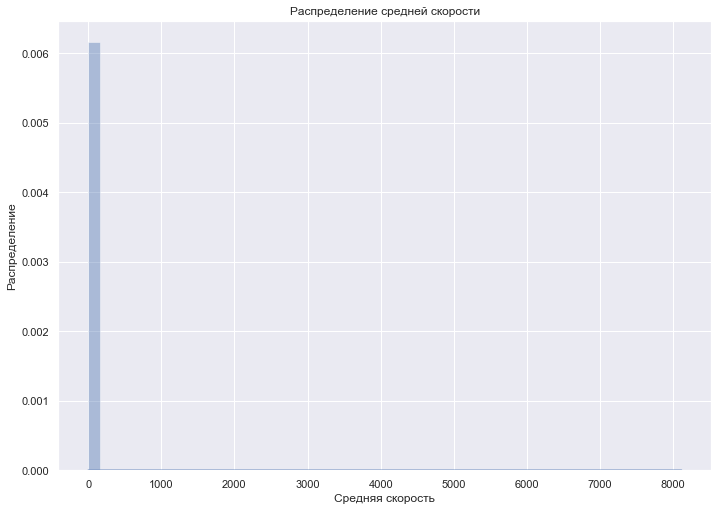

In [389]:
sns.distplot(train["mean_speed"])
plt.title("Распределение средней скорости")
plt.gca().set(xlabel='Средняя скорость', ylabel='Распределение')

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Средняя скорость')]

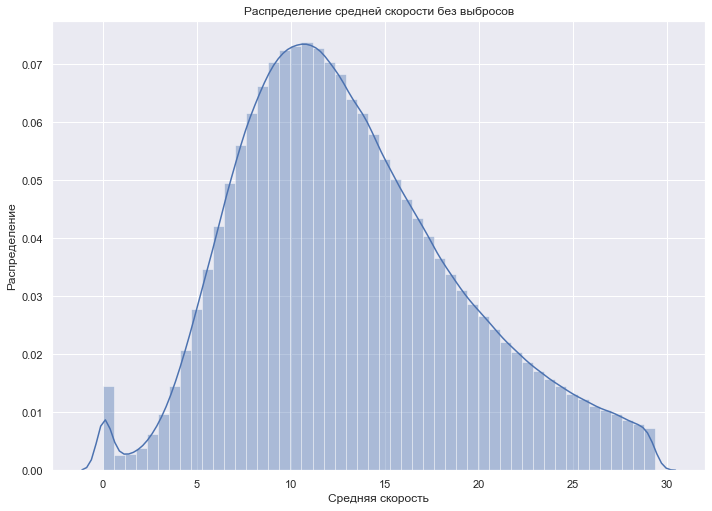

In [58]:
max_speed = train["mean_speed"].quantile(q=0.95)
train_draw = train.loc[train["mean_speed"] < max_speed]

sns.distplot(train_draw["mean_speed"])
plt.title("Распределение средней скорости без выбросов")
plt.gca().set(xlabel='Средняя скорость', ylabel='Распределение')

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [367]:
median_speed = train.groupby([train["weekday"], train["pickup_hour"]]).median()["mean_speed"]

In [204]:
weekdays = pd.Series(median_speed.index.values).apply(lambda x: x[0])
hours = pd.Series(median_speed.index.values).apply(lambda x: x[1])
median_speed = (pd.concat([weekdays, hours, pd.Series(median_speed.values)], axis=1).rename(
    columns={0: 'weekday', 1: 'hours', 2: 'median_speed'}))

In [209]:
# сортирую таблицу по дням недели, чтобы дни недели были пн-вт-ср..., а то они в алфавитном порядке

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
median_speed['weekday'] = pd.Categorical(median_speed['weekday'], categories=cats, ordered=True)
median_speed = median_speed.sort_values('weekday')

In [211]:
median_speed = median_speed.pivot(index='weekday', columns='hours', values='median_speed')

[Text(81.753125, 0.5, 'Дни недели'), Text(0.5, 50.92999999999999, 'Часы')]

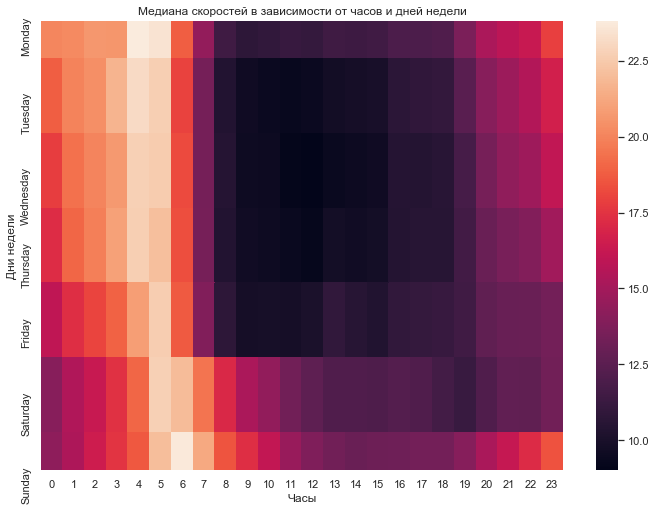

In [213]:
sns.heatmap(median_speed)
plt.title("Медиана скоростей в зависимости от часов и дней недели")
plt.gca().set(xlabel='Часы', ylabel='Дни недели')

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Мы считаем скорость с помощью таргета. Нельзя предсказывать таргет, используя таргет.

In [19]:
train = train.drop(columns=['mean_speed'])

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**. Минимальная примерно с 9 до 16 с вторника включительно до субботы невключительно. Максимальная в 4 и 5 утра во все дни.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [20]:
# Мы поняли, что свободные дороги в 4 и 5 утра во все дни, забитые --- с 9 до 16 с вторника включительно 
# до субботы невключительно. Сделаем тогда на основе этого признаки с 0 и 1

train["jams"] = ((train["pickup_hour"] <= 5) & (train["pickup_hour"] >= 4)).astype(np.int8)
train["free_roads"] = (((train["pickup_hour"] <= 16) & (train["pickup_hour"] >= 9) & (train["weekday"].
                                                                isin(['Monday', 'Saturday', 'Sunday']))).astype(np.int8))

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

Я погуглила координаты аэропорта Кеннеди и потыкала на карте на его края, чтобы узнать их координаты. Все, у чего долгота от 40.64 до 40.65, а долгота от -73.792 до -73.78, это аэропорт. Для аэропорта La Guardia: широта от 40.766 до 40.786, долгота от -73.87 до -73.855.

In [21]:
# создадим колонки с 0. потом в ней будут 1, если поездка в аэропорт/из него

train["pickup_1"] = 0
train["pickup_2"] = 0
train["dropoff_1"] = 0
train["dropoff_2"] = 0

In [22]:
train.loc[((40.64 <= train['pickup_latitude']) & (train['pickup_latitude'] <= 40.65)
            & (-73.792 <= train['pickup_longitude']) & (train['pickup_longitude'] <= -73.78)), 'pickup_1'] = 1
train.loc[((40.64 <= train['dropoff_latitude']) & (train['dropoff_latitude'] <= 40.65)
            & (-73.792 <= train['dropoff_longitude']) & (train['dropoff_longitude'] <= -73.78)), 'dropoff_1'] = 1
train.loc[((40.766 <= train['pickup_latitude']) & (train['pickup_latitude'] <= 40.786)
            & (-73.87 <= train['pickup_longitude']) & (train['pickup_longitude'] <= -73.855)), 'pickup_2'] = 1
train.loc[((40.766 <= train['dropoff_latitude']) & (train['dropoff_latitude'] <= 40.786)
            & (-73.87 <= train['dropoff_longitude']) & (train['dropoff_longitude'] <= -73.855)), 'dropoff_2'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Посадка в аэропорте-1')]

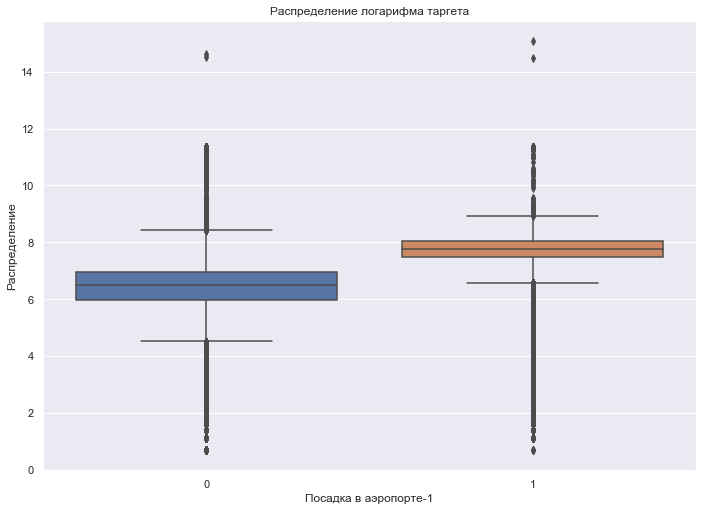

In [288]:
sns.boxplot(x=train['pickup_1'], y = train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Посадка в аэропорте-1', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Посадка в аэропорте-2')]

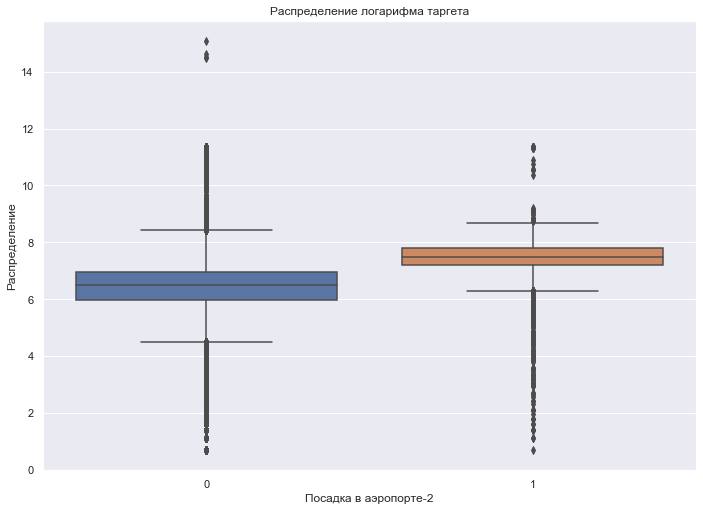

In [289]:
sns.boxplot(x=train['pickup_2'], y = train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Посадка в аэропорте-2', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Высадка в аэропорте-1')]

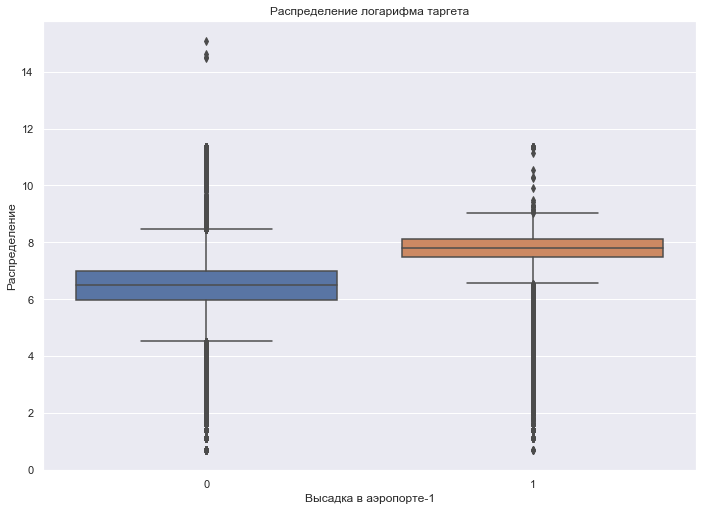

In [290]:
sns.boxplot(x=train['dropoff_1'], y = train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Высадка в аэропорте-1', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Высадка в аэропорте-2')]

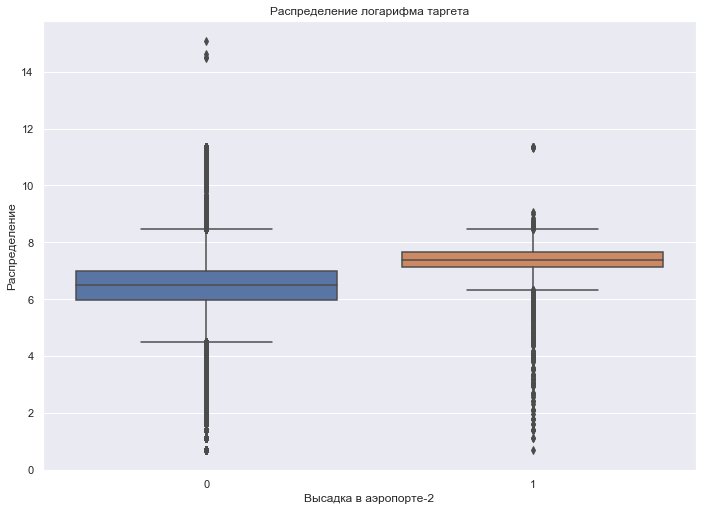

In [291]:
sns.boxplot(x=train['dropoff_2'], y = train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Высадка в аэропорте-2', ylabel='Распределение')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Да, ведь видно, что среднее время поездки из/в аэропорт и в другие места сильно отличаются. Так что признак многое даст (если поездка длиннее среднего, вероятно, она в аэропорт или из него).

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

**Сейчас расскажу мою идею**. Берем координаты краев прямоугольника. У верхнего левого угла координаты (x0, y0), у нижнего правого --- (x1, y1), остальные координаты из этого восстанавливаются. Длина горизонтальной стороны равна x2 - x1. Пусть мы хотим cols колонок и rows строк. Тогда длина одной колонки равна (x2 - x1)/cols. Аналогично ширина равна (y2 - y1)/rows. 

Как определить теперь, куда попадет какая точка? Пусть нам дана точка (x, y). Переместим наш прямоугольник левой верхней вершиной в начало координат: сдвинем на (x1, y1). Тогда точка будет с координатами (x - x1, y - y1). Теперь поделим нацело на длину/ширину колонки, получим ((x - x1)//((x2 - x1)/cols), (y - y1)/((y2 - y1)/rows)), где на первом месте стоит номер колонки, на втором --- номер строки. 

Как теперь получить номер ячейки? В каждой строке cols колонок. Тогда умножим номер строки на cols (получим, сколько у нас уже было ячеек) и прибавим номер столбца. Получим то, что надо!

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, coordinates, rows = 10, cols = 10):
        self.coordinates = coordinates
        
        # строки и столбцы
        self.rows = rows
        self.cols = cols
        
        # углы прямоугольника
        self.x0, self.x1 = coordinates[:, 0].min(), coordinates[:, 0].max()
        self.y0, self.y1 = coordinates[:, 1].min(), coordinates[:, 1].max()
        
    def fit(self, inplace, y = None):
        return self
    
    def transform(self, inplace, y = None):
        place = inplace.copy()
        
        x0 = self.x0
        y0 = self.y0
        x1 = self.x1
        y1 = self.y1
        cols = self.cols
        rows = self.rows
        
        # присвоим -1 точкам вне прямоугольника. координаты вершин п-ка я со слезами высчитала по приложению с картами...
        place.loc[((place['pickup_latitude'] < x0) | (place['pickup_latitude'] > x1) |
                    (place['pickup_longitude'] < y0) | (place['pickup_longitude'] > y1)), 'pickup_place'] = -1
        place.loc[((place['dropoff_latitude'] < x0) | (place['dropoff_latitude'] > x1) |
                    (place['dropoff_longitude'] < y0) | (place['dropoff_longitude'] > y1)), 'dropoff_place'] = -1
        
        # теперь номера ячеек
        place['pickup_place'] = ((inplace['pickup_latitude'] - x0)//((x1 - x0)/cols) + 
                                 (inplace['pickup_longitude'] - y0) // ((y1 - y0) / rows) * cols)
        
        place['dropoff_place'] = ((inplace['dropoff_latitude'] - x0) // ((x1 - x0) / cols) + 
                               (inplace['dropoff_longitude'] - y0) // ((y1 - y0) / rows) * cols)
       
        return place

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [328]:
coordinates = np.array([[40.7022, -74.018], [40.793, -73.934]])

target = train['log_trip_duration']
train_feat = train.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(train_feat, target, test_size=0.3, random_state=42)

numeric_features = ['ln_haversine']
categorical = ['weekday', 'month', 'pickup_hour', 'day_number', 'is_anomal_23_24', 'is_anomal_30', 'jams', 'free_roads',
               'pickup_1', 'pickup_2', 'dropoff_1', 'dropoff_2', 'pickup_place', 'dropoff_place']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

map_transformer = MapGridTransformer(coordinates)

pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.2167


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: vendor_id может быть (у какой-то компании могут быть в лучшем состоянии машины и быстрее ездят поэтому). passenger_count -- не похоже, что число пассажиров влияет, так что не может быть полезным. store_and_fwd_flag -- признак говорит, отправилась ли информация о поездке или нет (из-за плохого подключения). Если проблемы с подключением, возможно, сами по себе места не очень => дороги там не очень => поездки там дольше. 

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [330]:
len(set(train["vendor_id"])), len(set(train["passenger_count"])), len(set(train["store_and_fwd_flag"]))

(2, 10, 2)

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Компания такси')]

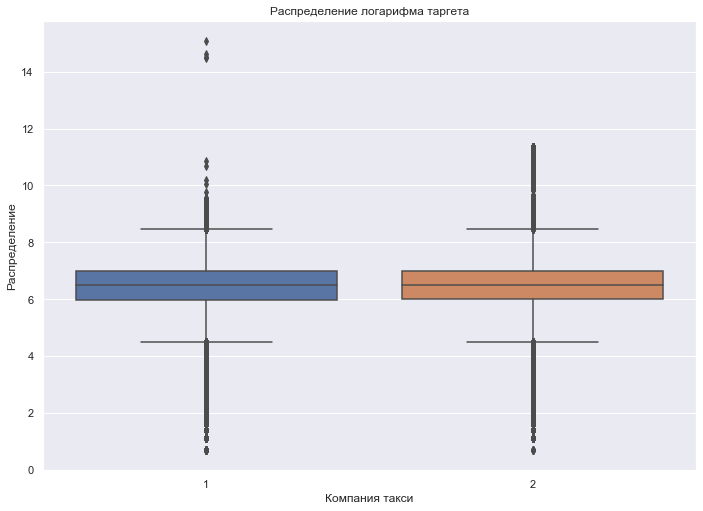

In [331]:
sns.boxplot(x=train['vendor_id'], y=train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Компания такси', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Число пассажиров')]

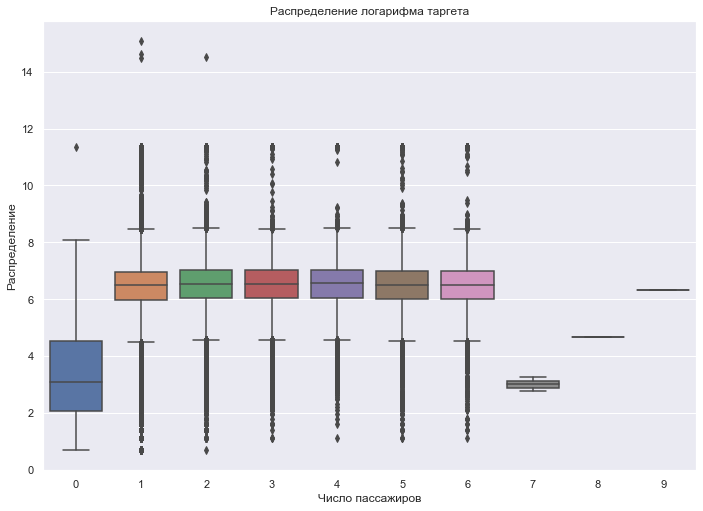

In [332]:
sns.boxplot(x=train['passenger_count'], y = train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Число пассажиров', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'),
 Text(0.5, 0, 'Загрузили ли данные или нет из-за сети')]

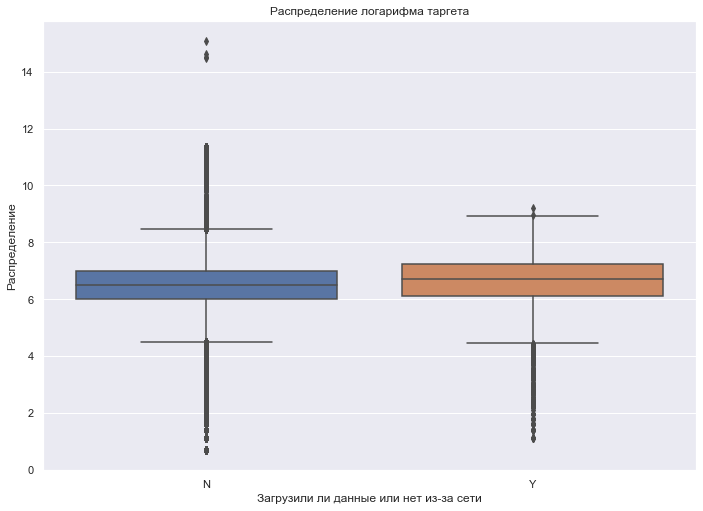

In [333]:
sns.boxplot(x=train['store_and_fwd_flag'], y = train['log_trip_duration'])
plt.title("Распределение логарифма таргета")
plt.gca().set(xlabel='Загрузили ли данные или нет из-за сети', ylabel='Распределение')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [25]:
train.loc[train['vendor_id'] == 2, 'vendor_id'] = 0
train.loc[train['store_and_fwd_flag'] == 'N'] = 0
train.loc[train['store_and_fwd_flag'] == 'Y'] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

У числа пассажиров и компании такси средний таргет одинаковый для разных категорий --- так что признак малополезный. Признак про сеть чуть более содержательный, чем остальные два, но все равно очень слабо.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [431]:
coordinates = np.array([[40.7022, -74.018], [40.793, -73.934]])

target = train['log_trip_duration']
train_feat = train.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(train_feat, target, test_size=0.3, random_state=42, shuffle=True)

numeric_features = ['ln_haversine']
categorical = ['weekday', 'month', 'pickup_hour', 'day_number', 'is_anomal_23_24', 'is_anomal_30', 'jams', 'free_roads',
               'pickup_1', 'pickup_2', 'dropoff_1', 'dropoff_2', 'pickup_place', 'dropoff_place', 
               'vendor_id', 'passenger_count', 'store_and_fwd_flag']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

map_transformer = MapGridTransformer(coordinates)

pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.2163


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [432]:
# не дали. Выбросим

train = train.drop(columns=['vendor_id', 'passenger_count', 'store_and_fwd_flag'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Хотим что-то сказать про обучающую выборку, так что сейчас будем смотреть на ней.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42, shuffle=True)

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Логарифм времени поездки')]

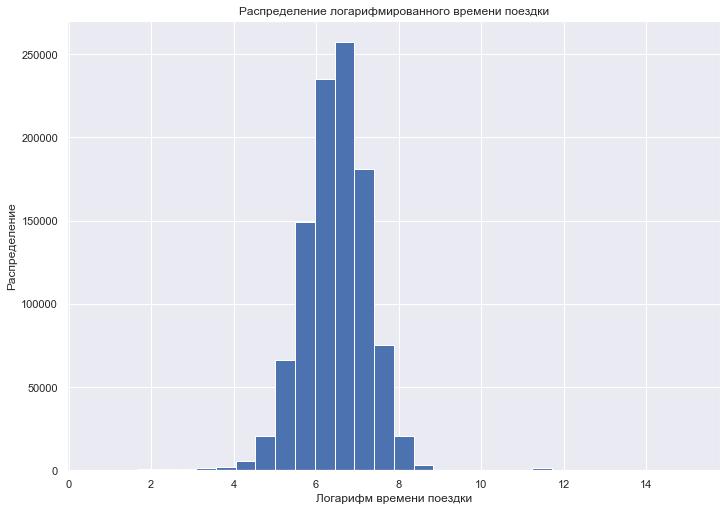

In [443]:
plt.hist(y_train, bins=30)
plt.title("Распределение логарифмированного времени поездки")
plt.gca().set(xlabel='Логарифм времени поездки', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'ln_haversine')]

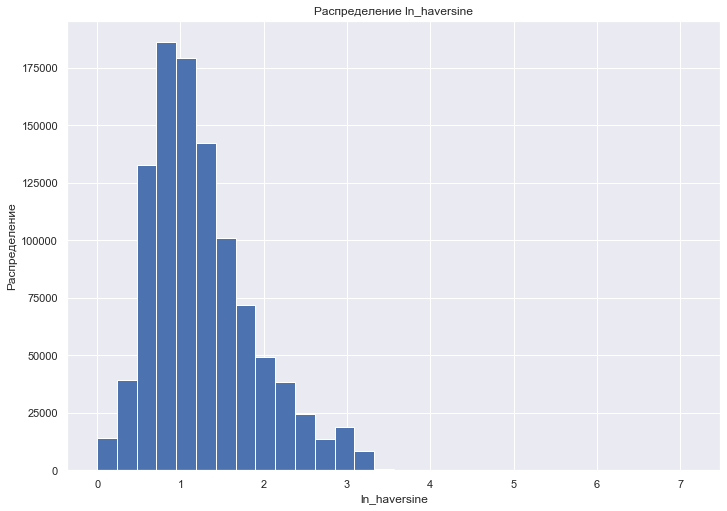

In [444]:
plt.hist(X_train['ln_haversine'], bins=30)
plt.title("Распределение ln_haversine")
plt.gca().set(xlabel='ln_haversine', ylabel='Распределение')

[Text(0, 0.5, 'Распределение'), Text(0.5, 0, 'Остатки')]

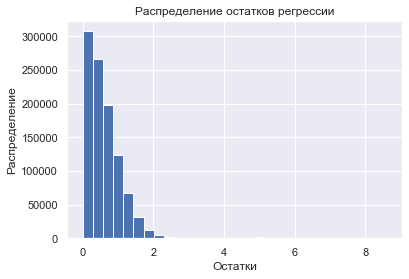

In [40]:
y_pred = model.predict(X_train)

plt.hist(abs(y_train - y_pred), bins=30)
plt.title("Распределение остатков регрессии")
plt.gca().set(xlabel='Остатки', ylabel='Распределение')

In [41]:
# удаляем выбросы

X_train = X_train[(y_train < 10) & (X_train["ln_haversine"] < 3.5) & (abs(y_train) - y_pred < 2)]
y_train = y_train[(y_train < 10) & (X_train["ln_haversine"] < 3.5) & (abs(y_train) - y_pred < 2)]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

Кажется, что из кандидатов --- только номер дня day_number и широта/долгота начала и конца поездки, но для них мы уже делали трансформер. Остальные или сразу закодированы 0 и 1, или день недели, месяц, час (не редкие категории, мы графики строили и видели, что для каждого дня недели/месяца/часа достаточно. День недели повторяется каждые 7 дней, в отличие от неповторяющегося номера дня в году. Так что проверим). Расстояние --- скорее числовой признак, но тоже можно проверить и объединить в категории, как показывали когда-то на лекции.

In [468]:
X_train.groupby(["day_number"]).count()["id"].sort_values()

# вроде ничего явного редкого!

day_number
023    1149
024    2350
151    3803
025    4200
150    4420
       ... 
044    6492
128    6533
107    6701
065    6728
100    6797
Name: id, Length: 182, dtype: int64

In [528]:
X_train.groupby(["pickup_hour"]).count()["id"].sort_values()

# да тоже не особо!

pickup_hour
5     10483
4     11025
3     14530
2     19258
6     23163
1     27085
0     37089
7     38827
16    44933
10    45689
8     46803
9     47266
11    47769
23    48656
13    49722
15    50281
12    50334
14    51977
17    53425
22    56094
21    58648
20    58694
18    62969
19    63063
Name: id, dtype: int64

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [539]:
coordinates = np.array([[40.7022, -74.018], [40.793, -73.934]])

numeric_features = ['ln_haversine']
categorical = ['weekday', 'month', 'pickup_hour', 'day_number', 'is_anomal_23_24', 'is_anomal_30', 'jams', 'free_roads',
               'pickup_1', 'pickup_2', 'dropoff_1', 'dropoff_2', 'pickup_place', 'dropoff_place']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

map_transformer = MapGridTransformer(coordinates)

pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.2171


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [514]:
# до

X_train.shape[1]

21

In [42]:
# после

map_transformer = MapGridTransformer(coordinates)
X_train_new = column_transformer.transform(map_transformer.fit_transform(X_train))
X_train_new.shape[1]

29

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [541]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Test MSE = 0.6314


ridge лучше себя показал

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [48]:
from sklearn.model_selection import GridSearchCV

new_train, new_val, new_y_train, new_y_test = train_test_split(X_train_new, y_train, test_size=0.2, random_state=42)

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], cv=5)
searcher.fit(new_train, new_y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best ridge alpha = %.4f" % best_alpha)

Best ridge alpha = 4.2813


In [47]:
from sklearn.model_selection import cross_val_score

searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], cv=5)
searcher.fit(X_train_new, y_train)

best_alpha_lasso = searcher.best_params_["alpha"]
print("Best lasso alpha = %.4f" % best_alpha_lasso)

Best lasso alpha = 0.0100


In [51]:
ridge_pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

lasso_pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha_lasso))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Lasso Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Ridge Test MSE = 0.6320
Lasso Test MSE = 0.6321


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [53]:
lasso_zeros = []

for alpha in alphas:
  lasso_pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha))
  ])

  model = lasso_pipeline.fit(X_train, y_train)
  lasso_zeros.append(np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0))

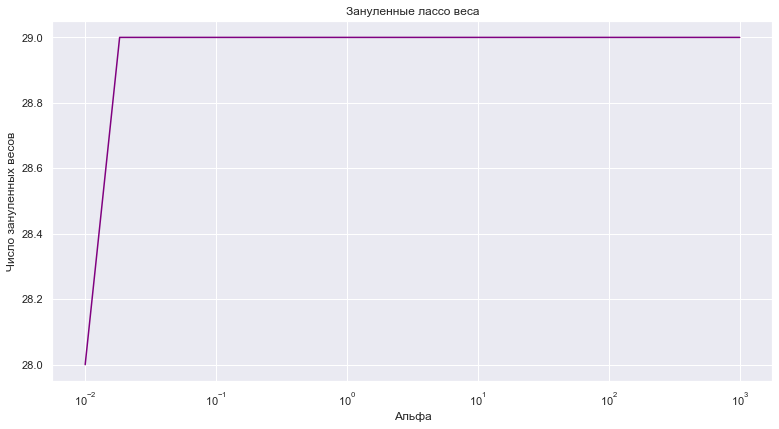

In [67]:
plt.plot(alphas, lasso_zeros, color='purple')
plt.title("Зануленные лассо веса")
plt.gca().set(xlabel='Альфа', ylabel='Число зануленных весов')

# получался ок график! но я сломала табличку и не успеваю перезапустить ячейки, чтобы стало ок...

В качестве теряем не сильно. Видим на графике, что при лучшей альфе у нас уже почти все признаки занулились.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**. Т.к. линейная модель не может вытащить связь между весами сама. Полезный, т.к. модель хорошо научится предсказывать время поездки для самых популярных поездок.

In [69]:
# создаем пары
pairs = (map_transformer.fit_transform(train)).groupby(['pickup_place', 'dropoff_place']).count()
pairs = pairs.loc[(pairs.index.get_level_values(0) != -1) & (pairs.index.get_level_values(1) != -1)]
df = pairs.nlargest(100, 'id')

# делаем столбики из -1
X_train['pair_place'] = -1
X_test['pair_place'] = -1

X_train_new = (map_transformer.fit_transform(X_train))
X_test_new = (map_transformer.fit_transform(X_test))

i = 0
for row, index in df.iterrows():
  X_train.loc[((X_train_new['pickup_place'] ==  row[0]) & (X_train_new['dropoff_place'] ==  row[1])), 'pair_place'] = i
  X_test.loc[((X_test_new['pickup_place'] ==  row[0]) & (X_test_new['dropoff_place'] ==  row[1])), 'pair_place'] = i
  i += 1

C:\Users\KOTIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KOTIK\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [68]:
numeric_features = ['ln_haversine']
categorical = ['weekday', 'month', 'pickup_hour', 'day_number', 'is_anomal_23_24', 'is_anomal_30', 'jams', 'free_roads',
               'pickup_1', 'pickup_2', 'dropoff_1', 'dropoff_2', 'pickup_place', 'dropoff_place']

ridge_pipeline = Pipeline(steps=[
    ('map_transform', map_transformer), 
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

model = ridge_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Ridge Test MSE = %.4f" % mean_squared_error(y_test, y_pred))

Ridge Test MSE = 0.6320


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
train["manhattan_distances"] = manhattan_distances(train["pickup_longitude"], )

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.